#### Student Name: Mai Ngo
#### Course Name and Number: DSC 478 Programming Machine Learning Applications
#### Assignment 1
#### Date: 4/14/2023

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

1. Download the data set adult-modified.csv and load it into an appropriate data structure such as a Pandas dataframe. Explore the general characteristics of the data as a whole: examine the means, standard deviations, and other statistics associated with the numeric attributes and frequencies associated with categorical attributes.

#### Load into Pandas dataframe. 

In [2]:
pdAdult = pd.read_csv("adult-modified.csv") 
pdAdult.shape
#Read data as Pandas dataframe and get number of rows and columns. 

(9412, 8)

In [3]:
pdAdult.head(5)
#Get the first 5 rows. 

,age,workclass,education,marital-status,race,sex,hours-per-week,income
0,39,Public,13,Single,White,Male,40,<=50K
1,50,Self-emp,13,Married,White,Male,13,<=50K
2,38,Private,9,Single,White,Male,40,<=50K
3,53,Private,7,Married,Black,Male,40,<=50K
4,28,Private,13,Married,Black,Female,40,<=50K


In [4]:
pdAdult.columns
#Get all column names.

Index(['age', 'workclass', 'education', 'marital-status', 'race', 'sex',
       'hours-per-week', 'income'],
      dtype='object')

In [5]:
pdAdult.dtypes
#Get data type of each column. 

age                int64
workclass         object
education          int64
marital-status    object
race              object
sex               object
hours-per-week     int64
income            object
dtype: object

#### Explore the general characteristics.

Numerical: age, education, and hours-per-week. 

    *On average, partipant's age is around 38 year-old. Majority finished high-school (10 years of education).
    *Avergae people works 40 hours/week. And some works up to 100 hours.
    
Categorical: workclass, marital-status, race, sex, and income. 
    
    *Majority of participant work in private sector, are married, and white male with low-income.
    *There are total 9412 observations in the data set. 85% are white race; 68% are male; and 75% are in the low-income group. 

In [6]:
pdAdult.describe(include="all")
#Generate descriptive statistics for all variables. 

,age,workclass,education,marital-status,race,sex,hours-per-week,income
count,9412.000000,9412,9412.000000,9412,9412,9412,9412.000000,9412
unique,NaN,3,NaN,2,5,2,NaN,2
top,NaN,Private,NaN,Married,White,Male,NaN,<=50K
freq,NaN,6947,NaN,4737,8062,6383,NaN,7093
mean,38.357310,NaN,10.125266,NaN,NaN,NaN,41.080217,NaN
std,12.962135,NaN,2.542118,NaN,NaN,NaN,11.884590,NaN
min,17.000000,NaN,1.000000,NaN,NaN,NaN,1.000000,NaN
25%,28.000000,NaN,9.000000,NaN,NaN,NaN,40.000000,NaN
50%,37.000000,NaN,10.000000,NaN,NaN,NaN,40.000000,NaN
75%,47.000000,NaN,13.000000,NaN,NaN,NaN,45.000000,NaN


2. For the three numeric attributes (age, hours-per-week, education), display box plots that show the overall dispersion and skew in these variables. Next, create histograms for these three variables showing the overall data distribution in each. Finally, display a scatter plot of age (x-axis) vs. hours-per-week (y-axis).

#### Boxplot.

    *Age variable is skewed right with mean > median. Observation range is between 17-90 with majority is in 30-50.
    *Hours-per-week has a unimodal distribution with many outliers, has a big concentration at 20-40 working hour/week range. 
    *Education has a bimodal distribution and slightly skewed left. Interestingly, I was using bins = 4 for four levels of education initially and receive unimodal distribution with peak at 10 years of education. However, when I used bins = 8, we can see that the variable has a 2 peaks distribution which shows tendencies of finished high school, and college drop out.   

Text(0.5, 1.0, 'Boxplot: Age, Hours per Week, Education.')

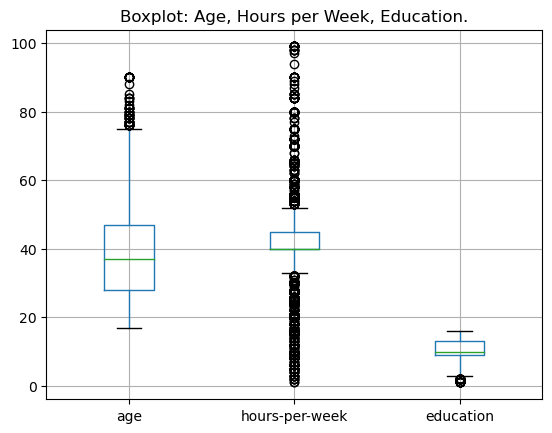

In [7]:
numBoxplot = pdAdult.boxplot(column = ["age","hours-per-week","education"], return_type='axes')
numBoxplot.plot()
numBoxplot.set_title("Boxplot: Age, Hours per Week, Education.")
#Generate box plot for numerical variables with title. 

#### Histogram.

Text(0.5, 1.0, 'Histogram: Age distribution.')

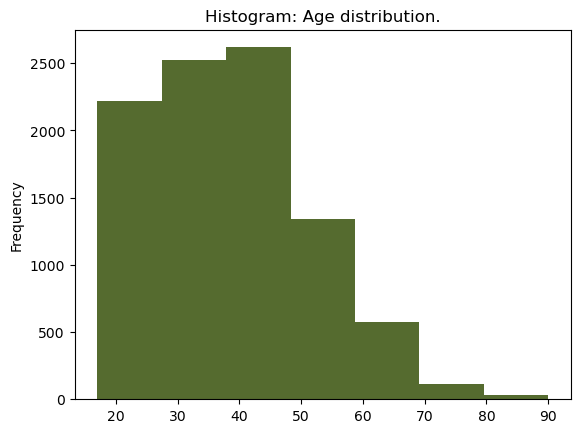

In [8]:
ageHist = pdAdult["age"].plot(kind="hist", bins=7, color ='darkolivegreen')
ageHist.plot()
ageHist.set_title("Histogram: Age distribution.")
#Generate histogram for age variable. Using bin=7 for 10 years per group.
#Could group by 4 as well: Early Adulthood, Early Middle Age, Late Middle Age, and Late Adulthood.

Text(0.5, 1.0, 'Histogram: Hour per Week distribution.')

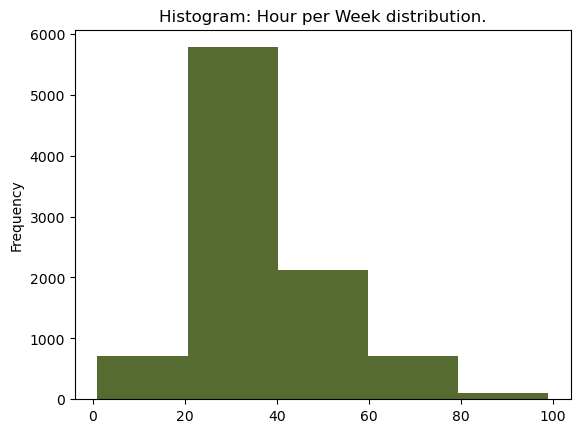

In [9]:
hpwHist = pdAdult["hours-per-week"].plot(kind="hist", bins=5, color ='darkolivegreen')
hpwHist.plot()
hpwHist.set_title("Histogram: Hour per Week distribution.")
#Generate histogram for age variable. Using bin=5 for 20 hours per group.

Text(0.5, 1.0, 'Histogram: Education distribution.')

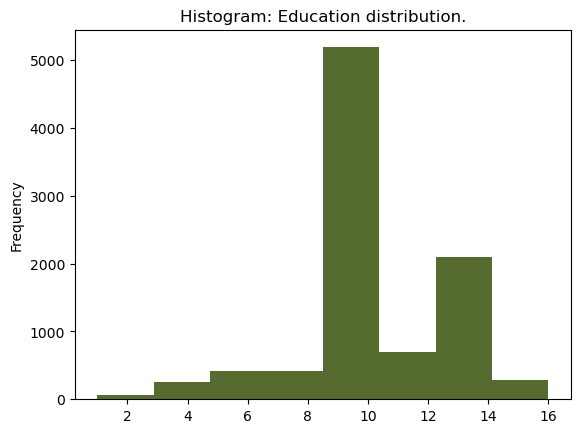

In [10]:
eduHist = pdAdult["education"].plot(kind="hist", bins=8, color ='darkolivegreen')
eduHist.plot()
eduHist.set_title("Histogram: Education distribution.")
#Generate histogram for age variable. Using bin=8 for every 2 years of education.
#Could group by 4 as well: Elementary, Middle, Highschool, and College. 

#### Scatterplot.

    *There is no distinctive pattern between age and hours-per-week. Indeed, correlation table shows late gives a low correlation coefficient of 0.103170.
    *The scatter plot shows majority of people between 20-60 years old work 30 to 50 hours per week. 

Text(0.5, 1.0, 'Scatterplot: Age vs. Hours per week')

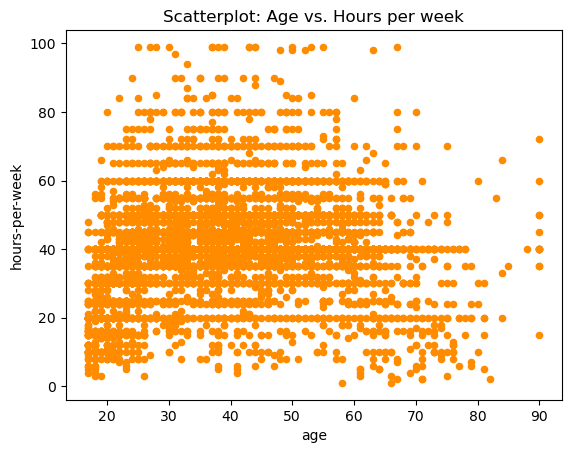

In [11]:
scatter = pdAdult.plot(x="age", y="hours-per-week", kind="scatter", color='darkorange')
scatter.plot()
scatter.set_title('Scatterplot: Age vs. Hours per week')
#Generate scatter plot. 

3. For the remaining categorical attributes create bar charts that show the distribution of category frequencies (e.g., married vs. single; private vs. public vs. self-emp; etc. Ideally, you should these bar charts in a single figure similar to this figure.

    *Most people works in private sector, and white race.
    *Marital status distribution are almost equal. 
    *Female participant takes one-third of the data population.

<AxesSubplot:title={'center':'Income Distribution'}, ylabel='Percentage'>

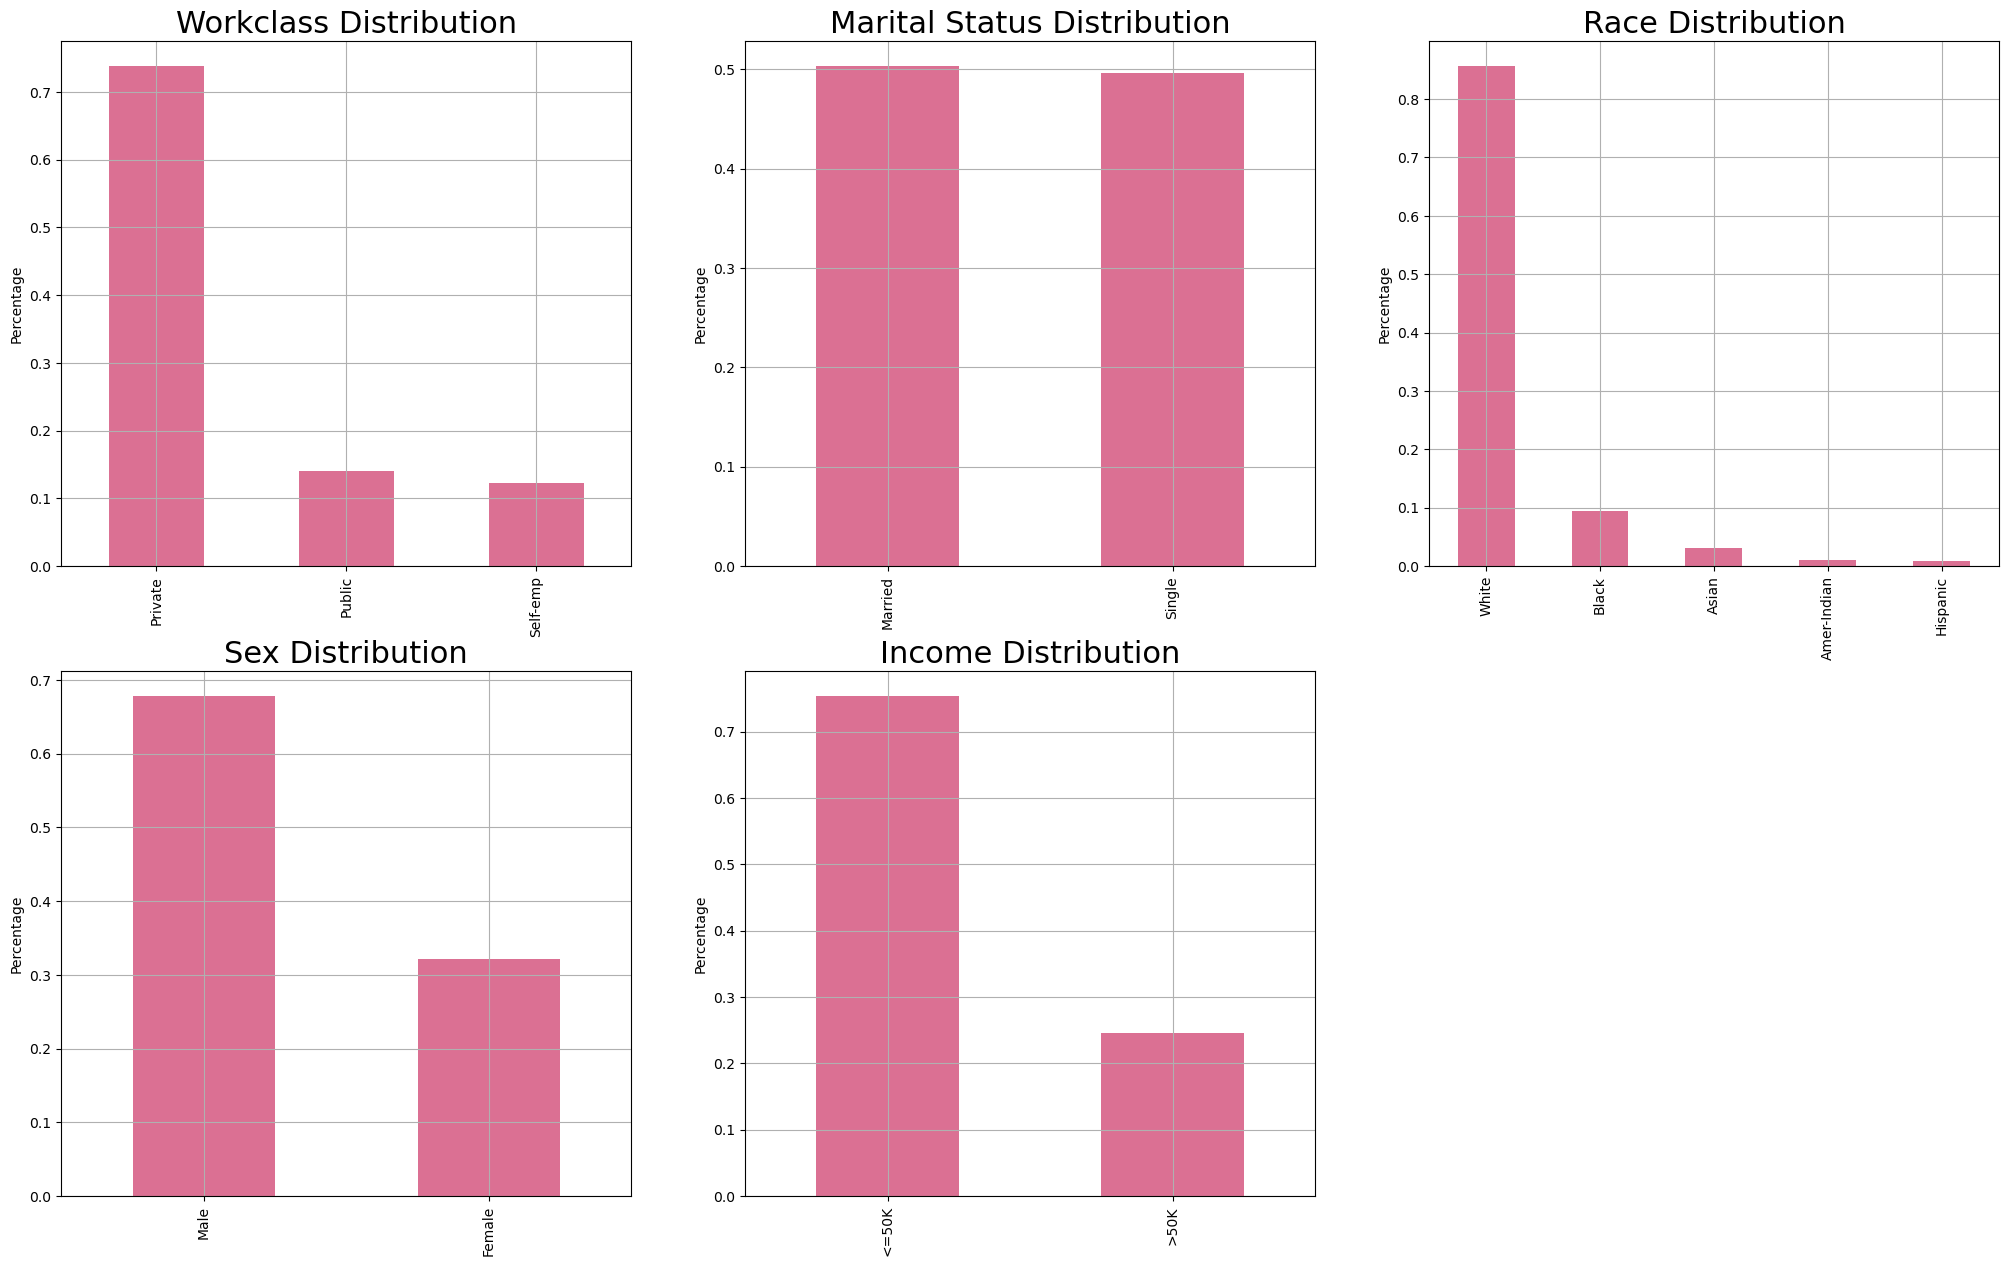

In [12]:
bar1 = pdAdult["workclass"].value_counts()/pdAdult["workclass"].count()
bar2 = pdAdult["marital-status"].value_counts()/pdAdult["marital-status"].count()
bar3 = pdAdult["race"].value_counts()/pdAdult["race"].count()
bar4 = pdAdult["sex"].value_counts()/pdAdult["sex"].count()
bar5 = pdAdult["income"].value_counts()/pdAdult["income"].count()
#Calculate percentage of each group in each categorical attribute. 

fig = plt.figure(figsize=(25,15))
#Generate master figure. 
fig.tight_layout()
#Automatically aligns subplots. 
ax1 = fig.add_subplot(231)
ax1.set_ylabel('Percentage')
ax1.set_title("Workclass Distribution", fontsize = 22)
bar1.plot(kind='bar', color='palevioletred', grid = True)

ax1 = fig.add_subplot(232)
ax1.set_ylabel('Percentage')
ax1.set_title("Marital Status Distribution", fontsize = 22)
bar2.plot(kind='bar', color='palevioletred', grid = True)

ax1 = fig.add_subplot(233)
ax1.set_ylabel('Percentage')
ax1.set_title("Race Distribution", fontsize = 22)
bar3.plot(kind='bar', color='palevioletred', grid = True)

ax1 = fig.add_subplot(234)
ax1.set_ylabel('Percentage')
ax1.set_title("Sex Distribution", fontsize = 22)
bar4.plot(kind='bar', color='palevioletred', grid = True)

ax1 = fig.add_subplot(235)
ax1.set_ylabel('Percentage')
ax1.set_title("Income Distribution", fontsize = 22)
bar5.plot(kind='bar', color='palevioletred', grid = True)
#Generate plot for each categorical attribute.

4. Perform a cross-tabulations of each of the workclass and race attributes with the income attribute. Show the resulting cross-tab tables as well as bar charts to visualize the relationships between these pairs of attributes. As an illustration, consider this graph depicting the cross-tabulation of sex with income. In the case of race vs. income cross-tab, create another chart comparing the percentages of each race category that fall in the low-income group. Remember to comment on observations.

#### Cross-tabulation: Sex vs. Income | Race vs. Income

In [13]:
pdAdult.groupby(["sex","income"])["income"].count()
#Generate cross-tabulation between sex and income.

sex     income
Female  <=50K     2669
        >50K       360
Male    <=50K     4424
        >50K      1959
Name: income, dtype: int64

In [14]:
pdAdult.groupby(["race","income"])["income"].count()

race         income
Amer-Indian  <=50K       83
             >50K         9
Asian        <=50K      224
             >50K        67
Black        <=50K      773
             >50K       119
Hispanic     <=50K       69
             >50K         6
White        <=50K     5944
             >50K      2118
Name: income, dtype: int64

#### Illustration: Race vs. Income (Low Income group)

In [15]:
race_income = pd.crosstab(pdAdult["race"], pdAdult["income"])
#Generate cross tabulation between race vs. income.

race_income["Low-income pct"] = race_income["<=50K"]/sum(race_income["<=50K"])
#Calculate race distribution by percentage within low-income group (<=50K).

print(sum(race_income["Low-income pct"]))
race_income

1.0


income,<=50K,>50K,Low-income pct
race,,,
Amer-Indian,83,9,0.011702
Asian,224,67,0.031580
Black,773,119,0.108981
Hispanic,69,6,0.009728
White,5944,2118,0.838009


#### Comment on race vs. income

    *Based on the chart, within the low-income group, most observations are white race. However this doesn't really mean much because we have 85% of observations in the dataset are white race.
    *Then followed by black, asian, american-indian, then hispanic. 
    *If the dataset is more proportionally distributed then I can make meaningful conclusion.

Text(0.5, 1.0, 'Low-income Group Distribution by Race.')

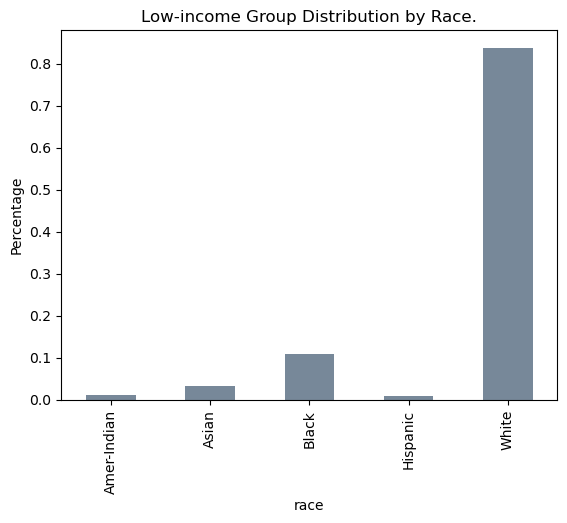

In [16]:
lowIncome_chart = race_income["Low-income pct"].plot(kind="bar", color ='lightslategray')
lowIncome_chart.plot()
lowIncome_chart.set_ylabel('Percentage')
lowIncome_chart.set_title("Low-income Group Distribution by Race.")
#Generate bar chart.

#### Illustration: Sex vs. Income

In [17]:
sex_income = pd.crosstab(pdAdult["sex"], pdAdult["income"])
sex_income

income,<=50K,>50K
sex,,
Female,2669,360
Male,4424,1959


#### Comment on sex vs. income

    *Majority of observation are in low-income group; and female has small data proportion compared to male.
    *Only 10% of female population are in high income group vs. 90% in low income. 
    *1/3 of male population are in high-income group (30%), and 2/3 are in low-income (70%). 
    *For low income group: 37% are female, and 63% are male.
    *For high income group: 15% are female, and 85 % are male. 

Text(0.5, 1.0, 'Income distribution by Sex.')

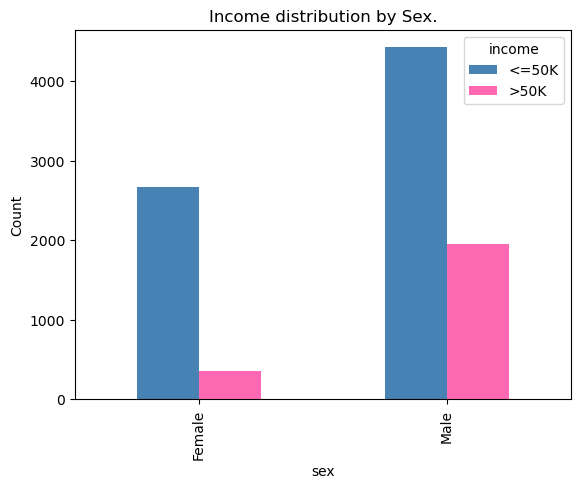

In [18]:
sex_incomeChart = sex_income.plot(kind="bar", color =['steelblue', 'hotpink'])
sex_incomeChart.set_ylabel('Count')
sex_incomeChart.set_title("Income distribution by Sex.")
#Generate bar chart for sex vs. income attributes.

5. Compare and contrast the characteristics of the low-income and high-income categories across the different attributes. You may consider first creating separate subsets of the data based on the income categories and then characterizing each subset by observing summary statistics for each group across different variables. Discuss your observations focusing specifically on unique characteristics that seem to distinguish among the two groups. You may (though you are not required to) use charts or plots for visualizing the differences in your analysis.

#### Observations discussion.

    *For low-income group, the dominant observation is Single white male working in private sector, with an average of 40 working hours/week. For low-income group, the dominant observation is Married white male working in private sector, with an average of 46 working hours/week.
    *Both groups have similar age distributions, unimodal and slightly right skewed with most observations from 20-60 year old, indicates typical working age range. 
    *For low-income group, majority of observations finished high-school or college drop-out, while for high-income group is finishing college education. As for working hours/week, low-income group typically works in the range 20-40 hours/week (part-time to full-time), while high-income group working hour rasnge is larger (20-80 hours) shows working overtime. 
    *I also plotted two graphs to show correlation between all numerical attributes. Low-income group has 2/3 observations in the dataset, data looks like equally distributed among ages. There is a concentration of 9-10 years of education mark with 20-40 of working hours/week range. As for high-income group, data is more sparse, high density with people who finished highschool and college, on average working somewhere 40-60 hours per week. 
    *As for categorical attributes, most dominant race in the dataset is white and working in private sector. Similar distribution between both low and high income groups. Slightly different, white race in low income group working in public sector more than self-employed, and vice versa for high-income group. 
    *Overall, some takeaways I can see are higher working hours lead to higher income, higher years of education also leads to higher income. The more money people make, they tend to stay single. 

In [19]:
pdLowIncome = pdAdult[pdAdult['income']=="<=50K"]
#Create subset for Low-income group. 
pdLowIncome

,age,workclass,education,marital-status,race,sex,hours-per-week,income
0,39,Public,13,Single,White,Male,40,<=50K
1,50,Self-emp,13,Married,White,Male,13,<=50K
2,38,Private,9,Single,White,Male,40,<=50K
3,53,Private,7,Married,Black,Male,40,<=50K
4,28,Private,13,Married,Black,Female,40,<=50K
...,...,...,...,...,...,...,...,...
9406,34,Self-emp,11,Married,White,Male,75,<=50K
9408,25,Private,9,Single,White,Female,8,<=50K
9409,21,Private,10,Single,Black,Male,40,<=50K
9410,38,Private,2,Married,White,Male,53,<=50K


In [20]:
pdLowIncome.describe(include="all")
#Summary statistics for low-income group. 

,age,workclass,education,marital-status,race,sex,hours-per-week,income
count,7093.000000,7093,7093.000000,7093,7093,7093,7093.000000,7093
unique,NaN,3,NaN,2,5,2,NaN,1
top,NaN,Private,NaN,Single,White,Male,NaN,<=50K
freq,NaN,5443,NaN,4363,5944,4424,NaN,7093
mean,36.635979,NaN,9.646976,NaN,NaN,NaN,39.567038,NaN
std,13.339117,NaN,2.397358,NaN,NaN,NaN,11.868506,NaN
min,17.000000,NaN,1.000000,NaN,NaN,NaN,1.000000,NaN
25%,26.000000,NaN,9.000000,NaN,NaN,NaN,38.000000,NaN
50%,35.000000,NaN,9.000000,NaN,NaN,NaN,40.000000,NaN
75%,45.000000,NaN,10.000000,NaN,NaN,NaN,40.000000,NaN


In [21]:
pdHighIncome = pdAdult[pdAdult['income']==">50K"]
#Create subset for High-income group. 
pdHighIncome

,age,workclass,education,marital-status,race,sex,hours-per-week,income
7,52,Self-emp,9,Married,White,Male,45,>50K
8,31,Private,14,Single,White,Female,50,>50K
9,42,Private,13,Married,White,Male,40,>50K
10,37,Private,10,Married,Black,Male,80,>50K
11,30,Public,13,Married,Asian,Male,40,>50K
...,...,...,...,...,...,...,...,...
9372,40,Private,9,Married,Black,Male,40,>50K
9375,47,Private,13,Married,White,Male,60,>50K
9379,38,Private,13,Married,White,Male,50,>50K
9385,43,Public,14,Single,Black,Female,40,>50K


In [22]:
pdHighIncome.describe(include="all")
#Summary statistics for high-income group. 

,age,workclass,education,marital-status,race,sex,hours-per-week,income
count,2319.000000,2319,2319.000000,2319,2319,2319,2319.000000,2319
unique,NaN,3,NaN,2,5,2,NaN,1
top,NaN,Private,NaN,Married,White,Male,NaN,>50K
freq,NaN,1504,NaN,2007,2118,1959,NaN,2319
mean,43.622251,NaN,11.588185,NaN,NaN,NaN,45.708495,NaN
std,10.047667,NaN,2.410764,NaN,NaN,NaN,10.678794,NaN
min,19.000000,NaN,2.000000,NaN,NaN,NaN,1.000000,NaN
25%,36.000000,NaN,9.000000,NaN,NaN,NaN,40.000000,NaN
50%,43.000000,NaN,12.000000,NaN,NaN,NaN,40.000000,NaN
75%,50.000000,NaN,13.000000,NaN,NaN,NaN,50.000000,NaN


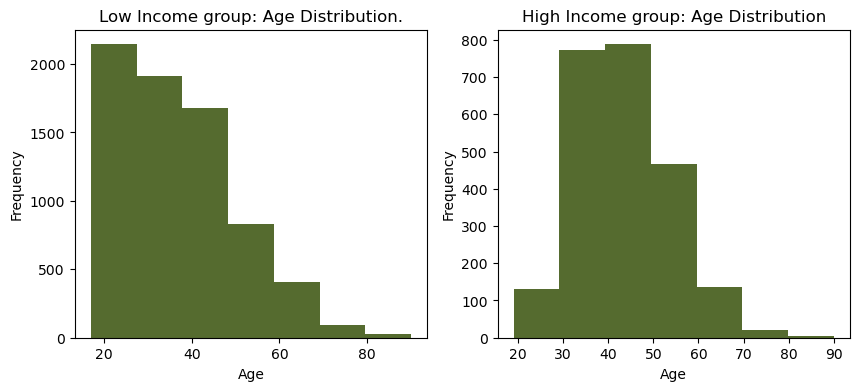

In [23]:
#Histogram to compare age distribution in both groups.
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Age')
ax1.set_title("Low Income group: Age Distribution.")
ageHist1 = pdLowIncome["age"].plot(kind="hist", bins=7, color ='darkolivegreen')

ax1 = fig.add_subplot(122)
ax1.set_xlabel('Age')
ax1.set_title("High Income group: Age Distribution")
ageHist1 = pdHighIncome["age"].plot(kind="hist", bins=7, color ='darkolivegreen')

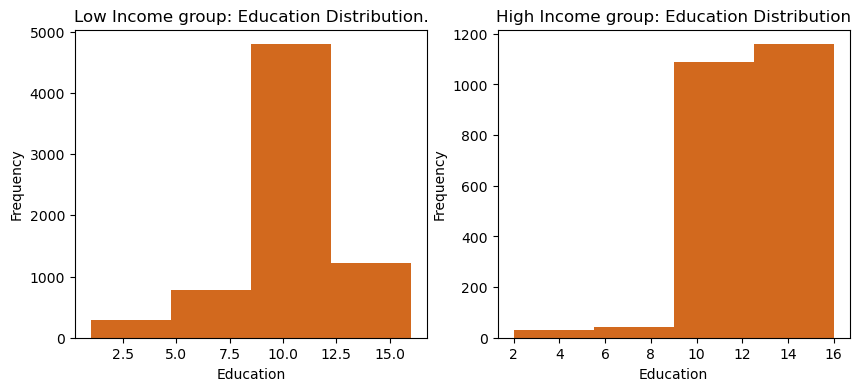

In [24]:
#Histogram to compare education distribution in both groups.
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Education')
ax1.set_title("Low Income group: Education Distribution.")
eduHist1 = pdLowIncome["education"].plot(kind="hist", bins=4, color ='chocolate')

ax1 = fig.add_subplot(122)
ax1.set_xlabel('Education')
ax1.set_title("High Income group: Education Distribution")
eduHist1 = pdHighIncome["education"].plot(kind="hist", bins=4, color ='chocolate')

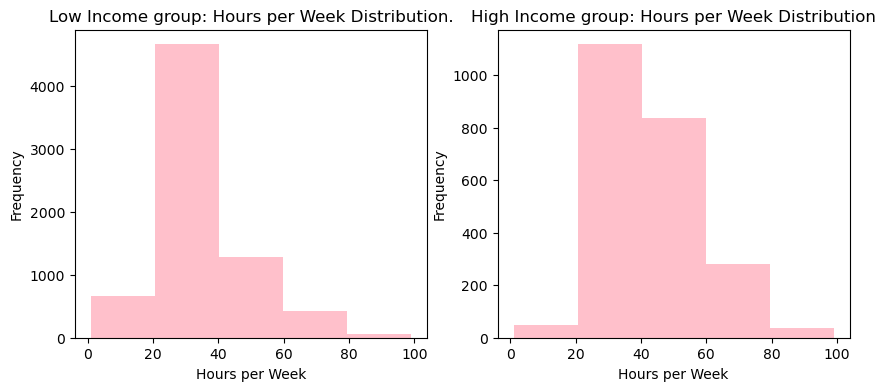

In [25]:
#Histogram to compare working hours per week distribution in both groups.
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Hours per Week')
ax1.set_title("Low Income group: Hours per Week Distribution.")
hpwHist1 = pdLowIncome["hours-per-week"].plot(kind="hist", bins=5, color ='pink')

ax1 = fig.add_subplot(122)
ax1.set_xlabel('Hours per Week')
ax1.set_title("High Income group: Hours per Week Distribution")
hpwHist1 = pdHighIncome["hours-per-week"].plot(kind="hist", bins=5, color ='pink')

Text(0.5, 1.0, 'Low Income group: Age vs. Education vs. Hours per Week')

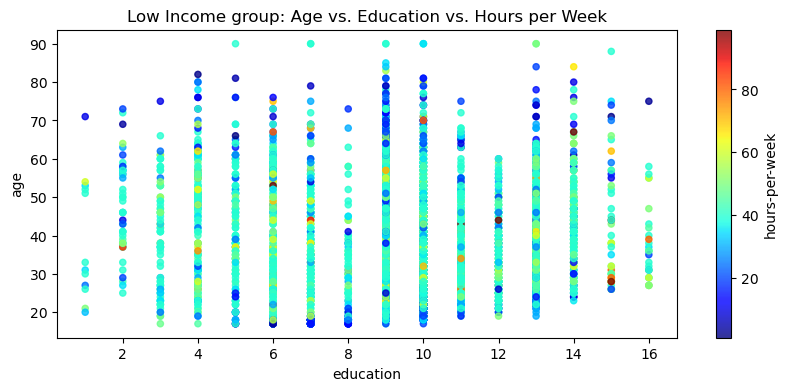

In [26]:
#Graph to show correlation between all numerical attributes in low-income group.
pdLowIncome_numchart = pdLowIncome.plot(x="education", y="age", kind="scatter", alpha=0.8, c="hours-per-week", cmap=plt.get_cmap("jet"), colorbar=True, figsize=(10,4))
pdLowIncome_numchart.set_title('Low Income group: Age vs. Education vs. Hours per Week')

Text(0.5, 1.0, 'High Income group: Age vs. Education vs. Hours per Week')

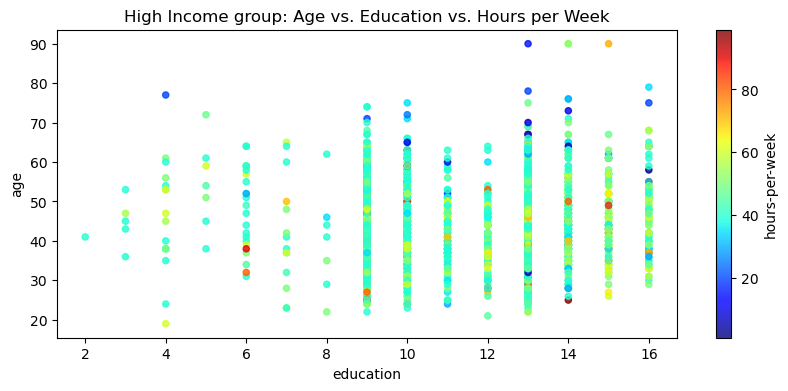

In [27]:
#Graph to show correlation between all numerical attributes in high-income group.
pdHighIncome_numchart = pdHighIncome.plot(x="education", y="age", kind="scatter", alpha=0.8, c="hours-per-week", cmap=plt.get_cmap("jet"), colorbar=True, figsize=(10,4))
pdHighIncome_numchart.set_title('High Income group: Age vs. Education vs. Hours per Week')

In [28]:
#Corss-tabulation of categorical attributes in low-income group.
class_raceLowInc = pd.crosstab(pdLowIncome["race"], pdLowIncome["workclass"])
class_raceLowInc

workclass,Private,Public,Self-emp
race,,,
Amer-Indian,61,17,5
Asian,162,33,29
Black,598,154,21
Hispanic,62,4,3
White,4560,717,667


In [29]:
#Corss-tabulation of categorical attributes in high-income group.
class_raceHighInc = pd.crosstab(pdHighIncome["race"], pdHighIncome["workclass"])
class_raceHighInc

workclass,Private,Public,Self-emp
race,,,
Amer-Indian,4,3,2
Asian,42,15,10
Black,66,38,15
Hispanic,2,1,3
White,1390,335,393


<AxesSubplot:title={'center':'High Income group: Workclass distribution by Race.'}, xlabel='race'>

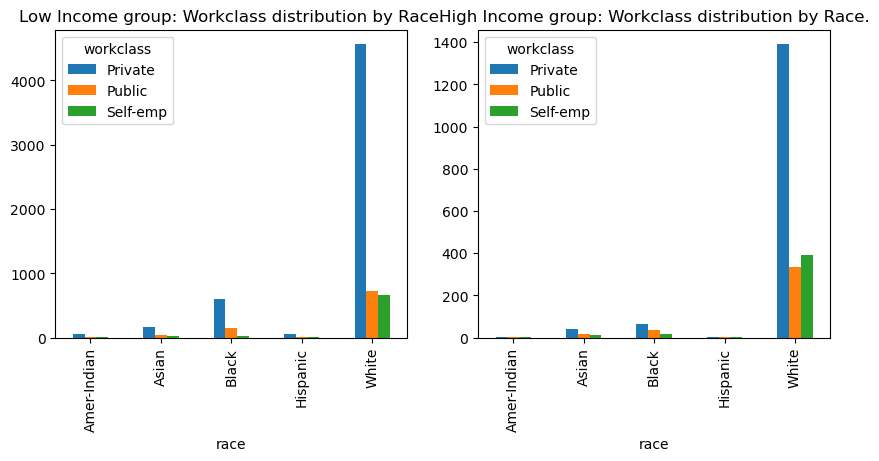

In [30]:
fig = plt.figure(figsize=(10,4))

# Define the first subplot
ax1 = fig.add_subplot(121)
ax1.set_title("Low Income group: Workclass distribution by Race.")
class_raceLowInc.plot(kind="bar", ax=ax1)

# Define the second subplot
ax2 = fig.add_subplot(122)
ax2.set_title("High Income group: Workclass distribution by Race.")
class_raceHighInc.plot(kind="bar", ax=ax2)

6. Convert the data into the standard spreadsheet format (data matrix). Note that this requires converting each categorical attribute into multiple binary ("dummy") attributes (one for each values of the categorical attribute) and assigning binary values corresponding to the presence or not presence of the attribute value in the original record). The numeric attributes should remain unchanged. Save this data in a new dataframe and show the top 10 rows in the new dataframe. Also save this new table into a local file called adult_numeric.csv.

In [31]:
dummyAdult = pd.get_dummies(pdAdult)
#Convert into dummy variables across dataframe.
#The numeric attributes should remain unchanged.

dummyAdult.head(10)
#Assign to new data frame and show the first 10 rows.
#After convert: 9412 observations, 17 attributes. 

,age,education,hours-per-week,workclass_Private,workclass_Public,workclass_Self-emp,marital-status_Married,marital-status_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male,income_<=50K,income_>50K
0,39,13,40,0,1,0,0,1,0,0,0,0,1,0,1,1,0
1,50,13,13,0,0,1,1,0,0,0,0,0,1,0,1,1,0
2,38,9,40,1,0,0,0,1,0,0,0,0,1,0,1,1,0
3,53,7,40,1,0,0,1,0,0,0,1,0,0,0,1,1,0
4,28,13,40,1,0,0,1,0,0,0,1,0,0,1,0,1,0
5,37,14,40,1,0,0,1,0,0,0,0,0,1,1,0,1,0
6,49,5,16,1,0,0,1,0,0,0,1,0,0,1,0,1,0
7,52,9,45,0,0,1,1,0,0,0,0,0,1,0,1,0,1
8,31,14,50,1,0,0,0,1,0,0,0,0,1,1,0,0,1
9,42,13,40,1,0,0,1,0,0,0,0,0,1,0,1,0,1


In [32]:
dummyAdult.describe()

,age,education,hours-per-week,workclass_Private,workclass_Public,workclass_Self-emp,marital-status_Married,marital-status_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male,income_<=50K,income_>50K
count,9412.000000,9412.000000,9412.000000,9412.000000,9412.000000,9412.000000,9412.000000,9412.000000,9412.000000,9412.000000,9412.000000,9412.000000,9412.000000,9412.000000,9412.000000,9412.000000,9412.000000
mean,38.357310,10.125266,41.080217,0.738100,0.139928,0.121972,0.503294,0.496706,0.009775,0.030918,0.094773,0.007969,0.856566,0.321823,0.678177,0.753612,0.246388
std,12.962135,2.542118,11.884590,0.439692,0.346930,0.327271,0.500016,0.500016,0.098388,0.173105,0.292916,0.088915,0.350533,0.467200,0.467200,0.430930,0.430930
min,17.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,9.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,37.000000,10.000000,40.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
75%,47.000000,13.000000,45.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,90.000000,16.000000,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
dummyAdult.to_csv("adult_numeric.csv", float_format="%1.2f", index=False)
#Save to a local file 'adult_numeric.csv'. Not to include index column. 

7. Using the numeric data set with the dummy variables (of the previous part), perform basic correlation analysis among the attributes. You need to construct a complete Correlation Matrix (with rows and columns corresponding to each variable).

#### Comment on attributes correlation overall.

    *Most significant correlation is between Marital status vs. Income at approximately |41%|.
    *Highest negative correlation between race - White vs. Black at 79%.
    *Smallest negative correlation between race - White vs. workclass - Private at 0.0389%

In [34]:
corr_matrix = dummyAdult.corr()
#Generate correlation table between each pair of attributes.
corr_matrix

,age,education,hours-per-week,workclass_Private,workclass_Public,workclass_Self-emp,marital-status_Married,marital-status_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male,income_<=50K,income_>50K
age,1.000000,0.034733,0.103170,-0.202982,0.080254,0.187633,0.381168,-0.381168,-0.010904,-0.008097,-0.008668,-0.031973,0.022413,-0.071804,0.071804,-0.232261,0.232261
education,0.034733,1.000000,0.141730,-0.154977,0.154462,0.044472,0.050627,-0.050627,-0.039308,0.057360,-0.069029,-0.044845,0.051765,-0.008180,0.008180,-0.329066,0.329066
hours-per-week,0.103170,0.141730,1.000000,-0.097753,-0.021407,0.154025,0.183944,-0.183944,0.002964,0.000550,-0.071442,0.011964,0.055561,-0.221588,0.221588,-0.222686,0.222686
workclass_Private,-0.202982,-0.154977,-0.097753,1.000000,-0.677134,-0.625700,-0.121014,0.121014,-0.007136,-0.015060,0.004632,0.023490,-0.000389,0.072569,-0.072569,0.116453,-0.116453
workclass_Public,0.080254,0.154462,-0.021407,-0.677134,1.000000,-0.150335,-0.002351,0.002351,0.022185,0.012883,0.070250,-0.018927,-0.066491,0.045338,-0.045338,-0.047981,0.047981
workclass_Self-emp,0.187633,0.044472,0.154025,-0.625700,-0.150335,1.000000,0.165075,-0.165075,-0.013931,0.006576,-0.080694,-0.011495,0.071008,-0.145559,0.145559,-0.105593,0.105593
marital-status_Married,0.381168,0.050627,0.183944,-0.121014,-0.002351,0.165075,1.000000,-1.000000,-0.013614,0.017852,-0.104427,0.000605,0.082114,-0.357736,0.357736,-0.414173,0.414173
marital-status_Single,-0.381168,-0.050627,-0.183944,0.121014,0.002351,-0.165075,-1.000000,1.000000,0.013614,-0.017852,0.104427,-0.000605,-0.082114,0.357736,-0.357736,0.414173,-0.414173
race_Amer-Indian,-0.010904,-0.039308,0.002964,-0.007136,0.022185,-0.013931,-0.013614,0.013614,1.000000,-0.017746,-0.032148,-0.008905,-0.242795,0.021711,-0.021711,0.034254,-0.034254
race_Asian,-0.008097,0.057360,0.000550,-0.015060,0.012883,0.006576,0.017852,-0.017852,-0.017746,1.000000,-0.057795,-0.016009,-0.436496,0.001773,-0.001773,0.006693,-0.006693


#### Give the name of one other method of correlation in corr(). What type of data does it apply to? 
Method corr() is used to generate corellations between each pair of NUMERICAL variables. There are three corellation methods can be used in corr(): Pearson, Kendall, and Spearman. 

#### Next, using your correlation matrix, display in decreasing order of correlations, all attributes and their correlations to education. Repeat this step to display correlations with the attribute income_<=50K. Briefly discuss your general observations about this sample of adult population based on this correlation analysis.

#### Comment on education attribute correlation.

    *There is a high correlation between education and income. 
    *Positive correlation between education and high-income group. Increasing 1 year of education resulting a 33% increment in income, and vice versa.
    *Positive corellation between education and number of working hours/week. Increasing 1 year of education resulting a 14% increment in working hours.
    *Negative correlations with some small sub-groups. Noticeable, negative correlation with workclass - Private. Increasing 1 year of education will decrease possibility of working in Private sector by 15%.

In [35]:
corr_matrix["education"].sort_values(ascending=False)
#Corellation of all attributes vs. education in descending order. 

education                 1.000000
income_>50K               0.329066
workclass_Public          0.154462
hours-per-week            0.141730
race_Asian                0.057360
race_White                0.051765
marital-status_Married    0.050627
workclass_Self-emp        0.044472
age                       0.034733
sex_Male                  0.008180
sex_Female               -0.008180
race_Amer-Indian         -0.039308
race_Hispanic            -0.044845
marital-status_Single    -0.050627
race_Black               -0.069029
workclass_Private        -0.154977
income_<=50K             -0.329066
Name: education, dtype: float64

#### Comment on lower-income group attribute correlation.

    *High correlation between low-income vs. marital status. Increasing 1 unit of income will increase the possibility of being Single by 41%, and vice versa. 
    *Interestingly, negative correlation with education and hours/week attributes. Increasing 1 unit of income will decrease years of education by 33%, and working hours/week by 22%.
    *Not significant correlation with race attribute overall.

In [36]:
corr_matrix["income_<=50K"].sort_values(ascending=False)
#Corellation of all attributes vs. income <=50K (aka. Low Income group) in descending order. 

income_<=50K              1.000000
marital-status_Single     0.414173
sex_Female                0.203886
workclass_Private         0.116453
race_Black                0.084836
race_Hispanic             0.034607
race_Amer-Indian          0.034254
race_Asian                0.006693
workclass_Public         -0.047981
race_White               -0.092589
workclass_Self-emp       -0.105593
sex_Male                 -0.203886
hours-per-week           -0.222686
age                      -0.232261
education                -0.329066
marital-status_Married   -0.414173
income_>50K              -1.000000
Name: income_<=50K, dtype: float64

8. Discretize the age attribute into 3 categories (corresponding to "young", "mid-age", and "old"). Do not change the original age attribute or add the discretized age to the table. Create a new dataframe with the numeric and the discretized age attributes as two columns and display the top 10 rows of the new dataframe.

In [37]:
age_bins = pd.qcut(dummyAdult.age, q=3, labels=["young", "mid-age", "old"])
age_bins.head(5)
#Discretize age attribute into 3 categories.

0    mid-age
1        old
2    mid-age
3        old
4      young
Name: age, dtype: category
Categories (3, object): ['young' < 'mid-age' < 'old']

In [38]:
pdAge = dummyAdult[['age']].copy()
pdAge.loc[:, 'discretized_age'] = age_bins
pdAge.head(10)
#Create dataframe for age attribute. Show first 10 rows.

,age,discretized_age
0,39,mid-age
1,50,old
2,38,mid-age
3,53,old
4,28,young
5,37,mid-age
6,49,old
7,52,old
8,31,young
9,42,mid-age


9. Use Min-Max Normalization to transform the values of the attribute hours-per-week the range 0.0-1.0 (without changing the original data). Next, perform zscore normalization to standardize the values of all numeric attributes (age, hours-per-week, education). The latter step should be performed on all three attributes at the same time instead of one-by-one (you may wish to first create a separate dataframe with only these attributes and perform the operation on the whole dataframe. Note: for this problem, you should write your own code to perform the normalization; do not use pre-existing functions such as scikit-learn's MinMaxScaler(). Finally, show the top 10 rows of the three versions of the hours-per-week attribute (original, normalized, and standardized) side-by-side in a new dataframe.

In [39]:
hpw = dummyAdult[['hours-per-week']].copy()
#Assign 'hours-per'week' attribute to a new dataframe.

min_maxNorm_hpw = (hpw - hpw.min()) / (hpw.max() - hpw.min())
#Apply min-max normalization, range (0.0-1.0).
min_maxNorm_hpw.head(5)

,hours-per-week
0,0.397959
1,0.122449
2,0.397959
3,0.397959
4,0.397959


In [40]:
numVar = dummyAdult[['age', 'hours-per-week', 'education']].copy()
#Assign all numerical attributes to a new dataframe.

zscoreNorm_numVar = (numVar - numVar.mean()) / numVar.std()
#Apply z-score standardization.
zscoreNorm_numVar.head(5)

,age,hours-per-week,education
0,0.049582,-0.090892,1.130842
1,0.898208,-2.362742,1.130842
2,-0.027566,-0.090892,-0.442649
3,1.129651,-0.090892,-1.229394
4,-0.799044,-0.090892,1.130842


In [41]:
pdHours_per_week = dummyAdult[['hours-per-week']].copy()
#Assign 'hours-per'week' attribute to a master dataframe.

pdHours_per_week = pdHours_per_week.rename(columns={'hours-per-week': 'hpw_original'})
#Rename original attribute.

pdHours_per_week.loc[:, 'hpw_minmaxNorm'] = min_maxNorm_hpw[['hours-per-week']].copy()
#Adding min-max normalization column to master dataframe.

pdHours_per_week.loc[:, 'hpw_zscoreStand'] = zscoreNorm_numVar[['hours-per-week']].copy()
#Adding z-score standardization column to master dataframe.

pdHours_per_week.head(10)
#Show the first 10 rows.

,hpw_original,hpw_minmaxNorm,hpw_zscoreStand
0,40,0.397959,-0.090892
1,13,0.122449,-2.362742
2,40,0.397959,-0.090892
3,40,0.397959,-0.090892
4,40,0.397959,-0.090892
5,40,0.397959,-0.090892
6,16,0.153061,-2.110314
7,45,0.448980,0.329821
8,50,0.500000,0.750534
9,40,0.397959,-0.090892


10. Now download a modified version of the data  (adult-modified-missing-vals.csv) that contains missing values.

In [42]:
pdAdult_missing = pd.read_csv("adult-modified-missing-vals.csv") 
#Read into Pandas dataframe.
pdAdult_missing.shape
#Get number of rows and columns. 

(10000, 8)

#### (a) Using Pandas determine all the attributes with missing values and the number of missing values for each such attribute.

In [43]:
pdAdult_missing.info()
#Check for missing values. 
#Realized missing value are "?" in csv file. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             10000 non-null  object
 1   workclass       10000 non-null  object
 2   education       10000 non-null  int64 
 3   marital-status  10000 non-null  object
 4   race            10000 non-null  object
 5   sex             10000 non-null  object
 6   hours-per-week  10000 non-null  int64 
 7   income          10000 non-null  object
dtypes: int64(2), object(6)
memory usage: 625.1+ KB


In [44]:
pdAdult_missing = pdAdult_missing.replace('?', np.nan)
#Replace "?" with 'NaN'

    *Two attributes with missing values: age and workclass.
    *Age: 198 missing values.
    *Workclass: 588 missing values.

In [45]:
pdAdult_missing.info()
#Check for missing values again. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             9802 non-null   object
 1   workclass       9412 non-null   object
 2   education       10000 non-null  int64 
 3   marital-status  10000 non-null  object
 4   race            10000 non-null  object
 5   sex             10000 non-null  object
 6   hours-per-week  10000 non-null  int64 
 7   income          10000 non-null  object
dtypes: int64(2), object(6)
memory usage: 625.1+ KB


#### (b) Show all the instances in the data that contain a missing value.

There are 777 rows (instances) with missing value. 

In [46]:
missing_rows = pdAdult_missing.isna().any(axis=1)
#Checking for rows with missing value (index).

print(pdAdult_missing[missing_rows])

      age workclass  education marital-status         race     sex  \
19    NaN  Self-emp         14         Single        White  Female   
27    NaN       NaN         10        Married        Asian    Male   
40    NaN   Private          5        Married        White    Male   
61     32       NaN          4        Married        White    Male   
65    NaN   Private          9        Married        White    Male   
...   ...       ...        ...            ...          ...     ...   
9965  NaN   Private         10        Married  Amer-Indian  Female   
9966  NaN   Private         13        Married        White    Male   
9987   67       NaN          4        Married        White    Male   
9993  NaN   Private          9        Married        White  Female   
9998  NaN   Private          2        Married        White    Male   

      hours-per-week income  
19                45   >50K  
27                60   >50K  
40                43  <=50K  
61                40  <=50K  
65       

#### (c) Fill the missing values for all numeric attributes using the mean value for the attribute.

In [47]:
pdAdult_missing.dtypes
#Check for data type of each attribute.

age               object
workclass         object
education          int64
marital-status    object
race              object
sex               object
hours-per-week     int64
income            object
dtype: object

In [48]:
pdAdult_missing['age'] = pdAdult_missing['age'].astype(float)
#Convert 'age' attribute to float and double check.
pdAdult_missing.dtypes

age               float64
workclass          object
education           int64
marital-status     object
race               object
sex                object
hours-per-week      int64
income             object
dtype: object

In [49]:
meanAge = pdAdult_missing['age'].mean()
#Calculate age attribute mean. 
print(meanAge)

38.449806162007754


In [50]:
pdAdult_missing['age'].fillna(meanAge, inplace=True)
#Replace missing values with mean.

#### (d) After filling in the missing numeric values, drop all rows where a categorical attribute contains a missing value. 

In [51]:
pdAdult_missing.info()
#Double check, it shows that age attribute has all meaningful values. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             10000 non-null  float64
 1   workclass       9412 non-null   object 
 2   education       10000 non-null  int64  
 3   marital-status  10000 non-null  object 
 4   race            10000 non-null  object 
 5   sex             10000 non-null  object 
 6   hours-per-week  10000 non-null  int64  
 7   income          10000 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 625.1+ KB


In [52]:
pdAdult_missing.dropna(subset=['workclass'], inplace=True)
#Drop rows with missing values in the dataset.
#At this point only categorical attribute 'workclass'.

#### (e) Show that the final resulting table does not contain missing values.

In [53]:
pdAdult_missing.info()
#Double check, now we can see dataset has 9412 rows.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9412 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             9412 non-null   float64
 1   workclass       9412 non-null   object 
 2   education       9412 non-null   int64  
 3   marital-status  9412 non-null   object 
 4   race            9412 non-null   object 
 5   sex             9412 non-null   object 
 6   hours-per-week  9412 non-null   int64  
 7   income          9412 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 661.8+ KB


In [54]:
print(pdAdult_missing.isnull().values.any())
#Check if there is any missing value in the dataset. Returns False. 

False
